In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality-dataset/WineQT.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor

**Load the data**

In [3]:
wine = pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
# shape of the Data
wine.shape

(1143, 13)

In [6]:
# Check for missing values 
wine.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
Id                      False
dtype: bool

In [7]:
# Check for duplicates 
wine.duplicated(subset=['Id']).any()

False

In [8]:
# overview of the data set
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [9]:
# breif decription of the data
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


## **Feature Engineering**

In [10]:
wine.drop('Id', axis=1, inplace=True)

In [11]:
wine.insert(3, 'total acid', value=np.sum(wine[wine.columns[:3]], axis=1))

In [12]:
wine.head()

,fixed acidity,volatile acidity,citric acid,total acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,8.10,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,8.68,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,8.60,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,12.04,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,8.10,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
wine = wine.copy()
y = wine.pop('quality')
X = wine

discrete_features = X.dtypes == int

In [14]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]

alcohol                 0.177097
total sulfur dioxide    0.084858
density                 0.063026
residual sugar          0.030255
Name: MI Scores, dtype: float64

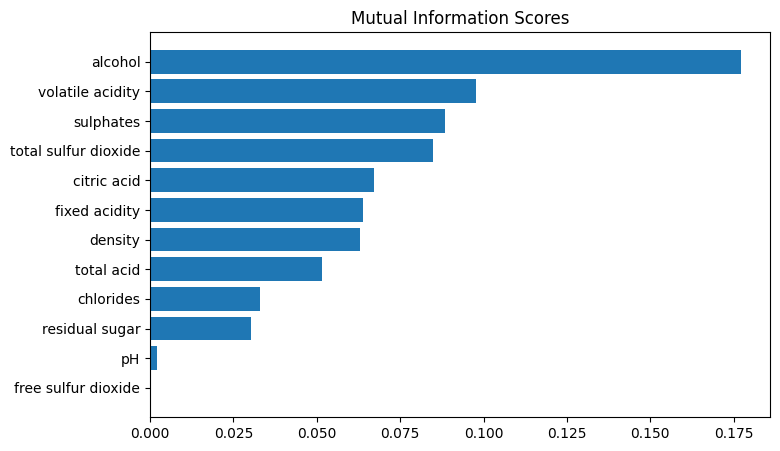

In [15]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

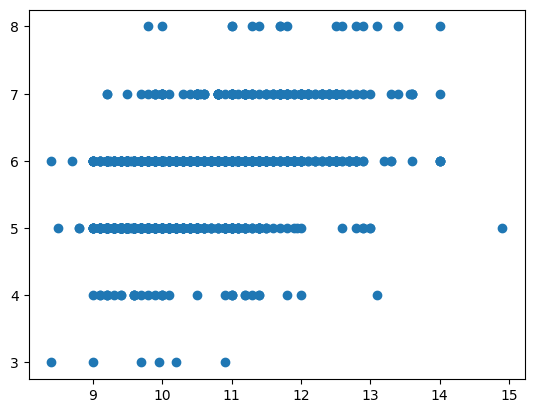

In [16]:
plt.scatter(x=wine['alcohol'], y=y)

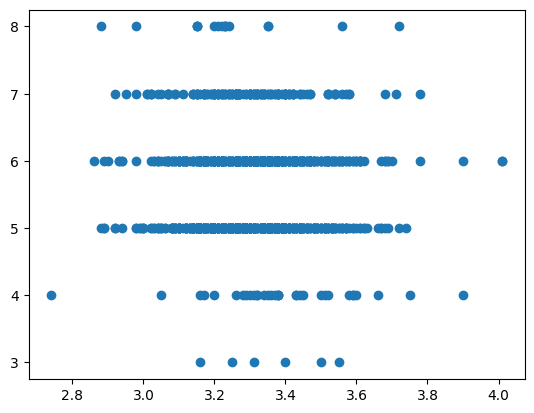

In [17]:
plt.scatter(x=wine.pH, y=y)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size=0.2)

## **Model Creation**

In [19]:
# Create Models

regressor = RandomForestRegressor(random_state=10)
classifier = RandomForestClassifier()
xgboost = XGBRegressor(random_state=10)

****

In [20]:
regressor.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=10, ...)

**Model Evaluation for RandomForest**

In [21]:
train_regressor_predictions = regressor.predict(X_train)
train_mean_absolute_error = mean_absolute_error(y_train, train_regressor_predictions)

test_regressor_predictions = regressor.predict(X_test)
test_mean_absolute_error = mean_absolute_error(y_test, test_regressor_predictions)

print('train_mean_absolute_error: ',train_mean_absolute_error)
print('test_mean_absolute_error: ',test_mean_absolute_error)

train_mean_absolute_error:  0.15835886214442008
test_mean_absolute_error:  0.45240174672489086


**Model Evaluation for XGBOOST**

In [22]:
train_xgboost_predictions = xgboost.predict(X_train)
train_xgboost_mean_absolute_error = mean_absolute_error(y_train, train_xgboost_predictions)

test_xgboost_predictions = xgboost.predict(X_test)
test_xgboost_mean_absolute_error = mean_absolute_error(y_test, test_xgboost_predictions)

print('train_xgboost_mean_absolute_error: ',train_xgboost_mean_absolute_error)
print('test_xgboost_mean_absolute_error: ',test_xgboost_mean_absolute_error)

train_xgboost_mean_absolute_error:  0.013731052630318073
test_xgboost_mean_absolute_error:  0.44128931661880694


## **Hyper parameter tunning**

In [23]:
def score(X_train, y_train, X_test, y_test, model_name, n_estimators):
    model = model_name(n_estimators=n_estimators, random_state=10)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    return mae

In [24]:
randomForest_result = {n_estimators: score(X_train, y_train, X_test, y_test, RandomForestRegressor, n_estimators) for n_estimators in np.arange(50, 1001, 50)}
xgboost_result = {n_estimators: score(X_train, y_train, X_test, y_test, XGBRegressor, n_estimators) for n_estimators in np.arange(50, 1001, 50)}

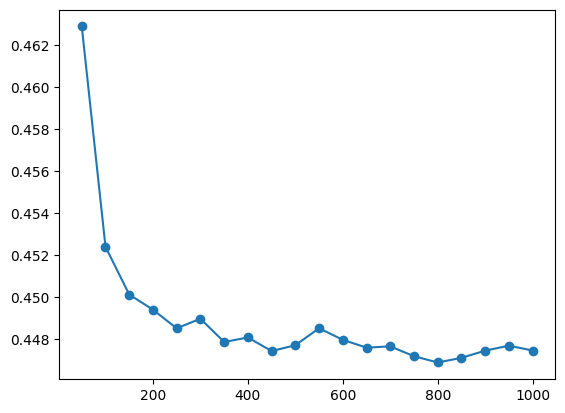

In [25]:
# RandomForest score performance
plt.plot(randomForest_result.keys(), randomForest_result.values(), marker='o')

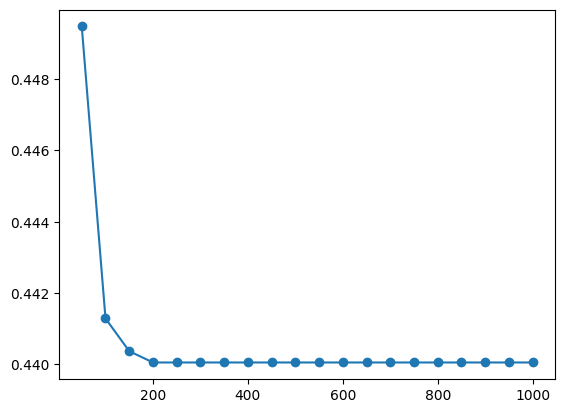

In [26]:
# XGBOOST score performance
plt.plot(xgboost_result.keys(), xgboost_result.values(), marker='o')

# **Final Prediction**

In [27]:
xgboost_model = XGBRegressor(n_estimators=200, random_state=10)
xgboost_model.fit(X_train, y_train)

train_xgboost_predictions = xgboost_model.predict(X_train)
train_xgboost_mean_absolute_error = mean_absolute_error(y_train, train_xgboost_predictions)

test_xgboost_predictions = xgboost_model.predict(X_test)
test_xgboost_mean_absolute_error = mean_absolute_error(y_test, test_xgboost_predictions)

print('train_xgboost_mean_absolute_error: ',train_xgboost_mean_absolute_error)
print('test_xgboost_mean_absolute_error: ',test_xgboost_mean_absolute_error)

train_xgboost_mean_absolute_error:  0.0009043613200114645
test_xgboost_mean_absolute_error:  0.44005520375014395
